In [1]:
#!:bash
python3 -m pip install  git+https://github.com/NVIDIA/NeMo.git@main

  Cloning https://github.com/NVIDIA/NeMo.git (to revision main) to /tmp/pip-req-build-h_1b9g2d
  Using cached setuptools-50.3.2-py3-none-any.whl (785 kB)
  Using cached wheel-0.35.1-py2.py3-none-any.whl (33 kB)
  Created wheel for nemo-toolkit: filename=nemo_toolkit-1.0.0b2-py3-none-any.whl size=584391 sha256=7f8da3772c2d748313b47b2850f0f3c00d49d9ff5c37adfa02350159d1e38eb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-f5reiqp9/wheels/82/66/ef/7248c1c27216d06425cab14b3391059534c889aaf2db89b855
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=142054 sha256=42ff208a27ccbddc7998c75d5d23ccf4320f3137f9e563005135947e1ba570f4
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=493275 sha256=0878ab95b286deebb63143199596b9ea13a4eb936d77498d9c446ebb9b670c45
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/44

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.7.0 requires torch==1.6.0, but you have torch 1.7.0 which is incompatible.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.4.0 which is incompatible.
tensorflow-metadata 0.25.0 requires absl-py<0.11,>=0.9, but you have absl-py 0.11.0 which is incompatible.
tensorflow-gpu 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.4.0 which is incompatible.
moto 1.3.14 requires idna<2.9,>=2.5, but you have idna 2.10 which is incompatible.
kaggle 1.5.8 requires urllib3<1.25,>=1.21.1, but you have urllib3 1.26.2 which is incompatible.
cloud-ml 0.0.1 requires tqdm<=4.53.0,>=4.45.0, but you have tqdm 4.54.0 which is incompatible.
botocore 1.15.49 requires urllib3<1.26,>=1.20; python_version != "3.4", but you have urllib3 1.26.2 which is incompatible.


In [2]:
%pip install ffmpeg 
%pip install braceexpand 
%pip install webdataset 
%pip install g2p_en 
%pip install frozendict 
%pip install unidecode 
%pip install torch_stft 
%pip install editdistance 
%pip install install sphfile

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=553f5f7cf36732d0946ad09a57f4dea778a31b7b98a55cc27267a31b6548ee07
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
  Using cached braceexpand-0.1.6-py2.py3-none-any.whl (5.4 kB)
     |████████████████████████████████| 275 kB 4.8 MB/s eta 0:00:01
  Using cached numpy-1.19.4-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
     |████████████████████████████████| 2.2 MB 18.2 MB/s eta 0:00:01
  Using cached PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 128 kB 18.1 MB/s eta 0:00:01
  Using cached torch-1.7.0-cp37-cp37m-manylinux1_x86_64.whl (776.7 MB)
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached future-0.18.2-py3-none-any.whl
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
ERROR: pip's dependency re

In [1]:
import os
import glob
import json
import wget
import copy
import scipy
import ffmpeg
import tarfile
import zipfile
import numpy as np 
import pandas as pd

import librosa
import librosa.display
import IPython.display as ipd

import pytorch_lightning as pl
import matplotlib.pyplot as plt

import nemo
import nemo.collections.asr as nemo_asr
import torch 

from tqdm import tqdm
from shutil import copy
from scipy.io import wavfile
from omegaconf import DictConfig
from contextlib import contextmanager

from nemo.collections.asr.metrics.wer import WER, word_error_rate
from nemo.collections.asr.models import EncDecCTCModel

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def download_extract_libri(data_dir, dataset_name):
    '''
    downloading the tar file with dataset and extract it into the directory
    '''
    if not os.path.exists(os.path.join(data_dir, f'{dataset_name}.tar.gz')):
        libri_url = f'http://www.openslr.org/resources/12/{dataset_name}.tar.gz'
        libri_path = wget.download(libri_url, data_dir)
        print(f"Dataset in .tar format downloaded at: {libri_path}")
    else:
        print("Tarfile already exists")
        libri_path = os.path.join(data_dir, f'{dataset_name}.tar.gz')
    extracted_dir = os.path.join(data_dir, 'Librispeech')
    if not os.path.exists(extracted_dir):
        tar = tarfile.open(libri_path)
        tar.extractall(path=data_dir)
        print(f"Tarfile extracted in {extracted_dir}")
    else:
        print(f"Tarfile already extracted in {extracted_dir}")
        
def flac2wav(data_dir, dataset_name):
    '''
    converting flac to wav
    '''
    print('Converting flac to wav....')
    flac_list = glob.glob(os.path.join(data_dir, f'LibriSpeech/{dataset_name}/**/**/*.flac'))  
    for flac_path in tqdm(flac_list, position=0, leave=False):
        wav_path = flac_path[:-5] + '.wav'
        os.system(f'ffmpeg -i {flac_path} {wav_path}')
        
    wav_files = glob.glob(os.path.join(data_dir, f'LibriSpeech/{dataset_name}/**/**/*.wav'))
    broken_files = [file for file in wav_files if os.path.getsize(file) < 100]
    assert len(broken_files) == 0
    for flac_path in flac_list:
        os.remove(flac_path)
    print('Finished')
    
def build_manifest(data_dir, dataset_name, manifest_path=os.getcwd() + '/LibriSpeech/manifest.json'):
    '''
    build_manifest(for training)
    '''
    print('Building manifest...')
    
    transcripts = glob.glob(os.path.join(data_dir, f'LibriSpeech/{dataset_name}/**/**/*.txt'))
    with open(manifest_path, 'w') as out_file:
        for trans_path in tqdm(transcripts, position=0, leave=False):
            with open(trans_path, 'r') as file:
                for line in file.readlines():   
                    
                    transcript = line.lower()[:-1]
                    audio_name = transcript.split(' ')[0]
                    text = transcript[len(transcript.split(' ')[0]) + 1:]
                    path_to_folder, _ = trans_path.rsplit('/', 1)
                    audio_path = os.path.join(path_to_folder, audio_name+'.wav')
                    duration = librosa.core.get_duration(filename=audio_path)
                    
                    metadata = {
                                "audio_filepath": audio_path,
                                "duration": duration,
                                "text": text
                                }
                    json.dump(metadata, out_file)
                    out_file.write('\n')
    print('Finished')

@contextmanager
def autocast(enabled=None):
    yield
    
def transcribe_audios(asr_model):
    '''
    Transcribe audios from created manifest file
    '''
    asr_model = asr_model.cuda()
    asr_model.eval()
    labels_map = dict([(i, asr_model.decoder.vocabulary[i]) for i in range(len(asr_model.decoder.vocabulary))])
    wer = WER(vocabulary=asr_model.decoder.vocabulary)
    hypotheses = []
    references = []
    for test_batch in tqdm(asr_model.test_dataloader(), leave=True, position=0):
        if torch.cuda.is_available():
            test_batch = [x.cuda() for x in test_batch]
        with autocast():
            log_probs, encoded_len, greedy_predictions = asr_model(
                input_signal=test_batch[0], input_signal_length=test_batch[1]
            )
        hypotheses += wer.ctc_decoder_predictions_tensor(greedy_predictions)
        for batch_ind in range(greedy_predictions.shape[0]):
            reference = ''.join([labels_map[c] for c in test_batch[2][batch_ind].cpu().detach().numpy()])
            references.append(reference)
        del test_batch
    wer_value = word_error_rate(hypotheses=hypotheses, references=references)
    return hypotheses, references, wer_value
            

In [6]:
class NoiseAgumentator:

    def __init__(self, dir_noises):
        self.noises = [(file_path.rsplit('/',1)[1].split('.')[0], np.array(scipy.io.wavfile.read(file_path)[1], dtype=np.float32))
                       for file_path in glob.glob(dir_noises +'/*.wav')]

    def make_noisy(self, audio, weights=[0.1], poison_coef=1):
        added_noises_idx = []
        audio = np.array(audio, dtype=np.float32)
        noised_audios = len(weights) * [audio]
        total = 1 + np.random.poisson(poison_coef)
        i = 0
        while i < total :
            noise_idx, noise = self.noises[np.random.randint(0, len(self.noises) - 1)]
            added_noises_idx.append(noise_idx)
            noise = np.resize(noise, len(audio))
            for idx, noise_weight in enumerate(weights):
                #noised_audios[idx] = noised_audios[idx] + noise_weight * noise
                noised_audios[idx] = (1.0 - noise_weight) * noised_audios[idx] + noise_weight * noise
            i += 1
        return noised_audios, added_noises_idx
    
def copy_directory_folders(inputpath, outputpath):
    """
    Copy folders from one directory to another
    """
    if not os.path.isdir(outputpath):
        os.mkdir(outputpath)
    for dirpath, dirnames, filenames in os.walk(inputpath):
        structure = os.path.join(outputpath, os.path.relpath(dirpath, inputpath))
        if not os.path.isdir(structure):
            os.mkdir(structure)
            
def copy_dir_txts_to_aug_folders(data_dir, dataset_name, coefs):
    """
    Copy folders from one directory to another and txt files containing references
    """
    transcripts = glob.glob(os.path.join(data_dir, f'LibriSpeech/{dataset_name}/**/**/*.txt'))
    inputpath = os.path.join(data_dir, 'LibriSpeech', dataset_name)
    for i in range(len(coefs)):
        noise_dataset_name = f'{dataset_name}_noised_{i}'
        outputpath = os.path.join(data_dir, 'LibriSpeech', noise_dataset_name)
        copy_directory_folders(inputpath, outputpath)

        for transcript_path in transcripts:
            l, r = transcript_path.split(f"/{dataset_name}/")
            path_to_copy = os.path.join(l, noise_dataset_name ,r.rsplit('/', 1)[0])
            copy(transcript_path, path_to_copy)   
            
def aug_noise_datastes(dataset_name, coefs, path_to_save_csv_with_noise_data='noise_info.csv'):
    """
    Augument audio data from one folder - dataset_name to others with the specific coefs of noises
    """
    audios = glob.glob(os.path.join(data_dir, f'LibriSpeech/{dataset_name}/**/**/*.wav'))
    noises_info = []

    for audio_path in tqdm(audios, position=0, leave=False): 
        sr, audio = scipy.io.wavfile.read(audio_path)
        part1, part2 = audio_path.split(dataset_name)
        noised, noises_idx = aug.make_noisy(audio, coefs)      
        for i, coef in enumerate(coefs):
            audio_noised = noised[i]
            audio_noised_path = f'{part1}{dataset_name}_noised_{i}{part2.split(".")[0]}.wav'
            scipy.io.wavfile.write(audio_noised_path, sr, audio_noised)

        noises_info.append((part2.rsplit('/', 1)[1], noises_idx))

    df_noise_info = pd.DataFrame(noises_info, columns=["audio_name", "noise"])
    df_noise_info.to_csv(path_to_save_csv_with_noise_data)

### Downloading of LibriSpeech dataset: dev-clean

more dataset by link: http://www.openslr.org/12/

In [5]:
data_dir = os.getcwd()
dataset_name ='dev-clean' 

download_extract_libri(data_dir, dataset_name)
flac2wav(data_dir, dataset_name)

Dataset in .tar format downloaded at: /home/jupyter/work/resources/dev-clean.tar.gz
Tarfile extracted in /home/jupyter/work/resources/Librispeech
Converting flac to wav....


Finished


### Downloading of noises (test dataset ~304 MB)

more noises by link: https://zenodo.org/record/2529934/files/FSDnoisy18k.audio_train.zip?download=1 ~9.2 GB

In [7]:
wget.download('https://zenodo.org/record/2529934/files/FSDnoisy18k.audio_test.zip?download=1')
with zipfile.ZipFile('FSDnoisy18k.audio_test.zip',"r") as zip_ref:
    zip_ref.extractall(os.path.join(data_dir, 'noises'))

In [8]:
dir_noises = os.path.join(data_dir, 'noises', 'FSDnoisy18k.audio_test')
aug = NoiseAgumentator(dir_noises)

### Augument data with noises  


$ noised\ audio = (1 - coef)\cdot audio + coef \cdot noise $

In [9]:
#ratio of noises
coefs = [0.1, 0.2]
copy_dir_txts_to_aug_folders(data_dir, dataset_name, coefs)
aug_noise_datastes(dataset_name, coefs)

### Test

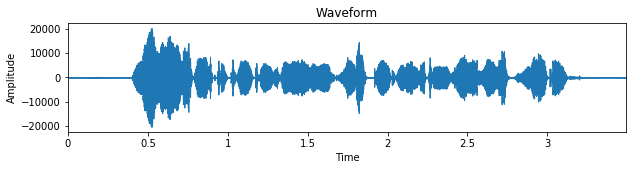

In [10]:
def plot(audio):
    plt.figure(figsize=(10, 2))
    plt.title('Waveform')
    plt.ylabel('Amplitude')

    _ = librosa.display.waveplot(audio.astype(float))

name = "1272/128104/1272-128104-0001"
audio_path = os.path.join(data_dir, f'LibriSpeech/{dataset_name}/{name}.wav')
sr, audio = wavfile.read(audio_path)
plot(audio)
ipd.Audio(audio, rate=sr)

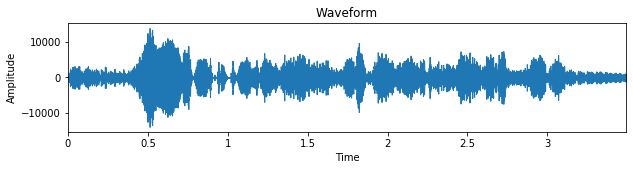

In [11]:
i=1
audio_path = os.path.join(data_dir, f'LibriSpeech/{dataset_name}_noised_{i}/{name}.wav')
sr, audio = wavfile.read(audio_path)
plot(audio)
ipd.Audio(audio, rate=sr)

### Building manifests for transcribing audios

In [12]:
noised_datasets = [f'{dataset_name}_noised_{i}' for i in range(len(coefs))]
datasets = [dataset_name] + noised_datasets

for dataset in datasets:
    build_manifest(data_dir, dataset,  manifest_path=os.path.join(data_dir,  'LibriSpeech', f'{dataset}_manifest.json'))

Building manifest...


Finished
Building manifest...


Finished
Building manifest...


Finished


### Loading model: Jasper10x5Dr-En

In [13]:
#!L
# other available models
EncDecCTCModel.list_available_models()

[PretrainedModelInfo(pretrained_model_name='QuartzNet15x5Base-En', description='QuartzNet15x5 model trained on six datasets: LibriSpeech, Mozilla Common Voice (validated clips from en_1488h_2019-12-10), WSJ, Fisher, Switchboard, and NSC Singapore English. It was trained with Apex/Amp optimization level O1 for 600 epochs. The model achieves a WER of 3.79% on LibriSpeech dev-clean, and a WER of 10.05% on dev-other.', location='https://api.ngc.nvidia.com/v2/models/nvidia/nemospeechmodels/versions/1.0.0a5/files/QuartzNet15x5Base-En.nemo', class_=None),
 PretrainedModelInfo(pretrained_model_name='QuartzNet15x5Base-Zh', description='QuartzNet15x5 model trained on ai-shell2 Mandarin Chinese dataset.', location='https://api.ngc.nvidia.com/v2/models/nvidia/nemospeechmodels/versions/1.0.0a5/files/QuartzNet15x5Base-Zh.nemo', class_=None),
 PretrainedModelInfo(pretrained_model_name='QuartzNet5x5LS-En', description='QuartzNet5x5 model trained on LibriSpeech dataset only. The model achieves a WER of

In [14]:
#!L
model_name = "Jasper10x5Dr-En"

asr_model = EncDecCTCModel.from_pretrained(model_name=model_name)

[NeMo I 2020-12-02 18:46:03 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemospeechmodels/versions/1.0.0a5/files/Jasper10x5Dr-En.nemo to /root/.cache/torch/NeMo/NeMo_1.0.0b2/Jasper10x5Dr-En/9ef38b64627c32936d70dad3269aca74/Jasper10x5Dr-En.nemo
[NeMo I 2020-12-02 18:51:39 common:417] Instantiating model from pre-trained checkpoint


[NeMo W 2020-12-02 18:51:52 modelPT:149] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: null
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    
[NeMo W 2020-12-02 18:51:52 modelPT:156] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: null
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
   

[NeMo I 2020-12-02 18:51:52 features:235] PADDING: 16
[NeMo I 2020-12-02 18:51:52 features:251] STFT using torch


[NeMo W 2020-12-02 18:51:52 nemo_logging:349] /home/jupyter/work/pyenv/hydra/_internal/utils.py:632: UserWarning: 
    Config key 'cls' is deprecated since Hydra 1.0 and will be removed in Hydra 1.1.
    Use '_target_' instead of 'cls'.
    See https://hydra.cc/docs/next/upgrades/0.11_to_1.0/object_instantiation_changes
      warnings.warn(message=msg, category=UserWarning)
    
[NeMo W 2020-12-02 18:51:52 nemo_logging:349] /home/jupyter/work/pyenv/hydra/_internal/utils.py:577: UserWarning: 
    Field 'params' is deprecated since Hydra 1.0 and will be removed in Hydra 1.1.
    Inline the content of params directly at the containing node.
    See https://hydra.cc/docs/next/upgrades/0.11_to_1.0/object_instantiation_changes
      warnings.warn(category=UserWarning, message=msg)
    
[NeMo W 2020-12-02 18:52:00 nemo_logging:349] /home/jupyter/work/pyenv/hydra/_internal/utils.py:632: UserWarning: 
    Config key 'cls' is deprecated since Hydra 1.0 and will be removed in Hydra 1.1.
    Use '

[NeMo I 2020-12-02 18:52:20 modelPT:405] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0b2/Jasper10x5Dr-En/9ef38b64627c32936d70dad3269aca74/Jasper10x5Dr-En.nemo.


[NeMo W 2020-12-02 18:52:37 nemo_logging:349] /kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:475: UserWarning: The following variables cannot be serialized: asr_model
      warnings.warn(message)
    


In [15]:
#!L
wers = []

for dataset in datasets:
    manifest_filepath = os.path.join(data_dir,  'LibriSpeech', f'{dataset}_manifest.json')
    asr_model.setup_test_data(
        test_data_config={
            'sample_rate': 16000,
            'manifest_filepath': manifest_filepath,
            'labels': asr_model.decoder.vocabulary,
            'batch_size': 4,
            'normalize_transcripts': True,
        }
    )
    
    hyp, refs, wer = transcribe_audios(asr_model)
    pd.DataFrame(zip(hyp, refs), columns = ['hypotheses', 'references']).to_csv(f'{dataset}.csv', index=False)
    wers.append(wer)

[NeMo I 2020-12-02 18:53:34 collections:173] Dataset loaded with 2703 files totalling 5.39 hours
[NeMo I 2020-12-02 18:53:34 collections:174] 0 files were filtered totalling 0.00 hours


  0%|          | 0/676 [00:00<?, ?it/s][NeMo W 2020-12-02 18:53:35 nemo_logging:349] /home/jupyter/work/pyenv/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
      normalized, onesided, return_complex)
    
[NeMo W 2020-12-02 18:53:35 nemo_logging:349] /home/jupyter/work/pyenv/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
      normalized, onesided, return_complex)
    
100%|██████████| 676/676 [03:17<00:00,  3.42it/s]


[NeMo I 2020-12-02 18:56:53 collections:173] Dataset loaded with 2703 files totalling 5.39 hours
[NeMo I 2020-12-02 18:56:53 collections:174] 0 files were filtered totalling 0.00 hours


100%|██████████| 676/676 [03:30<00:00,  3.21it/s]


[NeMo I 2020-12-02 19:00:24 collections:173] Dataset loaded with 2703 files totalling 5.39 hours
[NeMo I 2020-12-02 19:00:24 collections:174] 0 files were filtered totalling 0.00 hours


100%|██████████| 676/676 [03:28<00:00,  3.24it/s]
[NeMo W 2020-12-02 19:04:01 nemo_logging:349] /kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:475: UserWarning: The following variables cannot be serialized: asr_model
      warnings.warn(message)
    


In [16]:
#!L
wers

[0.034520789676850114, 0.08126539465460829, 0.16313738465497593]

In [ ]:
#!L
